In [159]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [127]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [128]:
df=pd.read_csv('Data/clean_main_data.csv')
df.head()

,Price,Bedrooms,Bathrooms,Area,Location
0,500000,3,1,120,Miami
1,3600000,4,3,265,Louran
2,6500000,2,3,214,San Stefano
3,3060000,3,3,204,San Stefano
4,2500000,3,3,165,Louran


In [129]:
df.describe()

,Price,Bedrooms,Bathrooms,Area
count,8955.000,8955.000,8955.000,8955.000
mean,1705347.627,2.685,1.651,397.880
std,3431809.547,0.737,0.804,11588.044
min,30000.000,1.000,1.000,10.000
25%,375000.000,2.000,1.000,110.000
50%,1100000.000,3.000,1.000,135.000
75%,2400000.000,3.000,2.000,175.000
max,256988515.000,10.000,10.000,950000.000


In [103]:
df['Price'].min()

30000

In [104]:
df['Price'].max()

256988515

<AxesSubplot:xlabel='Price', ylabel='Price'>

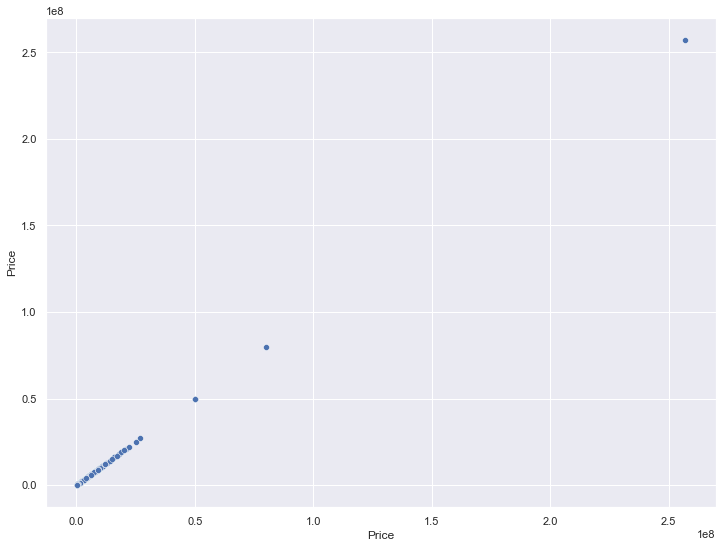

In [105]:
sns.scatterplot(data=df, x='Price', y='Price')

<AxesSubplot:>

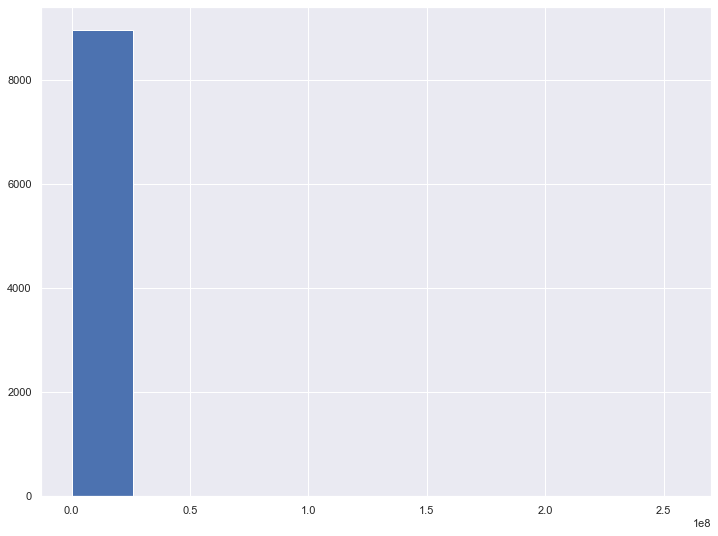

In [106]:
sns.set(rc={'figure.figsize':(12,9)})

df['Price'].hist()

In [107]:
df.sort_values(by='Price', ascending=False).head(50)

,Price,Bedrooms,Bathrooms,Area,Location
847,256988515,3,2,148,Roushdy
8877,80000000,2,1,70,Maamoura
3778,50000000,6,7,1075,Roushdy
8800,50000000,7,8,10000,Stanley
2245,27000000,10,10,600,Kafr Abdo
8341,25000000,3,2,150,Maamoura
2751,22000000,3,2,2220,Smoha
1014,21000000,4,5,600,San Stefano
7076,20000000,2,1,100,Agami
6366,20000000,6,4,385,San Stefano


## We got some outliers that we need to drop, lets drop rows >=5mil since we are not focusing on such high prices in this analysis

In [108]:
df[df['Price']>5000000].count()

Price        339
Bedrooms     339
Bathrooms    339
Area         339
Location     339
dtype: int64

In [109]:
df[df['Price']<5000000].count()

Price        8593
Bedrooms     8593
Bathrooms    8593
Area         8593
Location     8593
dtype: int64

In [110]:
df=df[df['Price']<5000000]

In [111]:
df['Price'].max()

4976147

<AxesSubplot:>

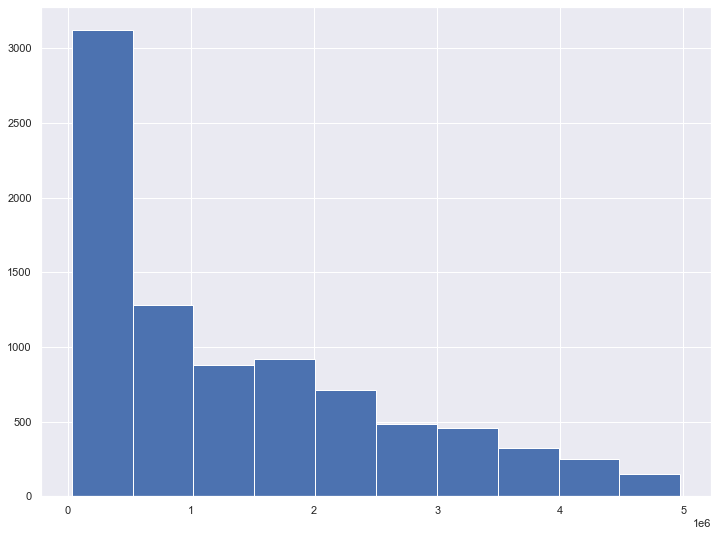

In [112]:
sns.set(rc={'figure.figsize':(12,9)})

df['Price'].hist()

## The data is very right skewed

In [115]:
df.groupby('Location').size().sort_values(ascending=False)

Location
Nakheel             1940
Smoha               1253
Agami                760
Sidi Beshr           510
Miami                423
Louran               353
Moharam Bik          317
Mandara              231
Roushdy              191
Glim                 186
Seyouf               185
Kafr Abdo            162
Saba Pasha           149
Asafra               147
Al Ibrahimiyyah      141
Sidi Gaber           125
Maamoura             125
Sporting             107
Gianaclis             93
Cleopatra             88
San Stefano           81
Montazah              77
Zezenia               77
Bolkly                72
Stanley               70
Fleming               67
Camp Caesar           67
Victoria              64
Abu Qir               55
Al Hadrah             55
Azarita               45
Bacchus               40
Awayed                37
Abu Talat             32
Raml Station          28
Bahray - Anfoshy      24
Borg al-Arab          24
Amreya                22
Schutz                20
Wardian         

In [151]:
location_price=df.groupby('Location').agg({"Price": np.mean, }).sort_values(by='Price', ascending=False)
location_price= location_price.reset_index()
location_price

,Location,Price
0,San Stefano,4938050.154
1,Roushdy,4407749.277
2,Raml Station,4029935.949
3,Stanley,3956392.405
4,Glim,3540189.022
5,Kabbary,3453000.000
6,Zezenia,3328292.157
7,Azarita,3235482.830
8,Kafr Abdo,3230387.277
9,Camp Caesar,3124477.564


In [139]:
location_price.columns

Index(['Price'], dtype='object')

<AxesSubplot:xlabel='Location', ylabel='Price'>

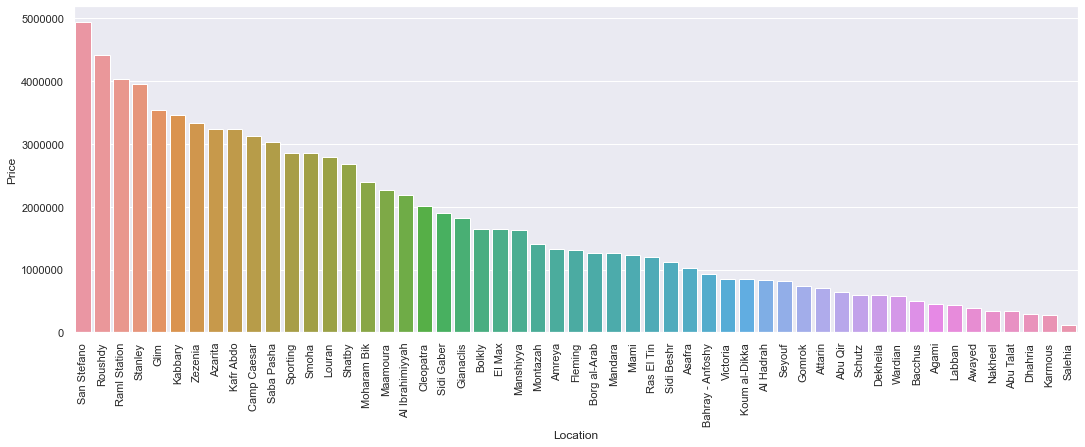

In [164]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.tick_params(axis='x', rotation=90)

plt.ticklabel_format(style='plain', axis='y')

sns.barplot(data=location_price, x='Location', y='Price',)